<a href="https://colab.research.google.com/github/Avinavshrestha/Tech405-/blob/main/Avinavshrestha_Week4_TECH405_CNN_ipynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [2]:
import tensorflow as tf
from tensorflow.keras.preprocessing import image_dataset_from_directory

# Paths to train and test folders
train_dir = '/content/drive/MyDrive/Shoes brand/test'
test_dir = '/content/drive/MyDrive/Shoes brand/train'

# Parameters
batch_size = 8
img_size = (150, 150)

# Load train and test datasets
train_dataset = image_dataset_from_directory(
    train_dir,
    image_size=img_size,
    batch_size=batch_size,
    shuffle=True
)

test_dataset = image_dataset_from_directory(
    test_dir,
    image_size=img_size,
    batch_size=batch_size
)

# Optimize dataset loading
AUTOTUNE = tf.data.AUTOTUNE
train_dataset = train_dataset.prefetch(buffer_size=AUTOTUNE)
test_dataset = test_dataset.prefetch(buffer_size=AUTOTUNE)



Found 114 files belonging to 3 classes.
Found 711 files belonging to 3 classes.


In [3]:
model_1 = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(3, activation='softmax')
])

model_1.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [4]:
model_2 = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation='sigmoid', input_shape=(150, 150, 3)),
    tf.keras.layers.AveragePooling2D((2, 2)),
    tf.keras.layers.Conv2D(64, (3, 3), activation='sigmoid'),
    tf.keras.layers.AveragePooling2D((2, 2)),
    tf.keras.layers.Conv2D(128, (3, 3), activation='sigmoid'),
    tf.keras.layers.AveragePooling2D((2, 2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(256, activation='sigmoid'),
    tf.keras.layers.Dense(3, activation='softmax')
])

model_2.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])


In [5]:
model_3 = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.GlobalAveragePooling2D(),
    tf.keras.layers.Dense(64, activation='tanh'),
    tf.keras.layers.Dense(3, activation='softmax')
])

model_3.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])


In [8]:
# Train and evaluate Model 1
print("Training Model 1...")
history_1 = model_1.fit(train_dataset, validation_data=test_dataset, epochs=10)
print("Testing Model 1...")
results_1 = model_1.evaluate(test_dataset)
print(f"Model 1 (ReLU + MaxPooling) Test Accuracy: {results_1[1] * 100:.2f}%\n")

# Train and evaluate Model 2
print("Training Model 2...")
history_2 = model_2.fit(train_dataset, validation_data=test_dataset, epochs=10)
print("Testing Model 2...")
results_2 = model_2.evaluate(test_dataset)
print(f"Model 2 (Sigmoid + AveragePooling) Test Accuracy: {results_2[1] * 100:.2f}%\n")

# Train and evaluate Model 3
print("Training Model 3...")
history_3 = model_3.fit(train_dataset, validation_data=test_dataset, epochs=10)
print("Testing Model 3...")
results_3 = model_3.evaluate(test_dataset)
print(f"Model 3 (Mixed Activations + GlobalPooling) Test Accuracy: {results_3[1] * 100:.2f}%\n")


Training Model 1...
Epoch 1/10
15/15 ━━━━━━━━━━━━━━━━━━━━ 15s 1s/step - accuracy: 1.0000 - loss: 2.7142e-04 - val_accuracy: 0.4613 - val_loss: 4.2645
Epoch 2/10
15/15 ━━━━━━━━━━━━━━━━━━━━ 20s 956ms/step - accuracy: 1.0000 - loss: 1.0060e-04 - val_accuracy: 0.4613 - val_loss: 4.3891
Epoch 3/10
15/15 ━━━━━━━━━━━━━━━━━━━━ 21s 1s/step - accuracy: 1.0000 - loss: 2.5170e-05 - val_accuracy: 0.4684 - val_loss: 4.4644
Epoch 4/10
15/15 ━━━━━━━━━━━━━━━━━━━━ 20s 1s/step - accuracy: 1.0000 - loss: 1.0040e-05 - val_accuracy: 0.4655 - val_loss: 4.4702
Epoch 5/10
15/15 ━━━━━━━━━━━━━━━━━━━━ 20s 1s/step - accuracy: 1.0000 - loss: 8.7670e-06 - val_accuracy: 0.4627 - val_loss: 4.4731
Epoch 6/10
15/15 ━━━━━━━━━━━━━━━━━━━━ 21s 1s/step - accuracy: 1.0000 - loss: 9.6335e-06 - val_accuracy: 0.4669 - val_loss: 4.5014
Epoch 7/10
15/15 ━━━━━━━━━━━━━━━━━━━━ 20s 995ms/step - accuracy: 1.0000 - loss: 3.3067e-06 - val_accuracy: 0.4669 - val_loss: 4.5254
Epoch 8/10
15/15 ━━━━━━━━━━━━━━━━━━━━ 21s 1s/step - accuracy: 1.

Class Names: ['adidas', 'nike', 'converse']
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 169ms/step


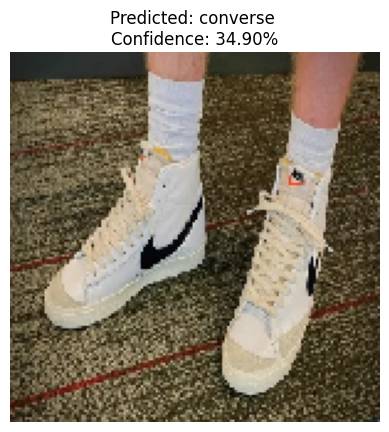

In [13]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.utils import load_img, img_to_array

# Function to preprocess and predict a single image
def classify_image(image_path, model, class_names):
    # Load and preprocess the image
    img = load_img(image_path, target_size=(150, 150))  # Resize to model input size
    img_array = img_to_array(img)  # Convert to array
    img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension
    img_array = img_array / 255.0  # Normalize to [0, 1]

    # Predict
    predictions = model.predict(img_array)
    predicted_class = np.argmax(predictions, axis=1)[0]  # Get the predicted class index

    # Display the image and prediction
    plt.imshow(img)
    plt.title(f"Predicted: {class_names[predicted_class]} \nConfidence: {np.max(predictions) * 100:.2f}%")
    plt.axis("off")
    plt.show()


# Retrieve class names from train_dataset
class_names = ['adidas','nike','converse']
print("Class Names:", class_names)



# Test the function with an example image
example_image_path = '/content/drive/MyDrive/Shoes brand/test/nike/0.jpg'  # Replace with your test image path
classify_image(example_image_path, model_1, class_names)  # Replace model_1 with model_2 or model_3 for testing



1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 109ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 139ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 175ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 158ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 133ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 139ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 148ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 151ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 152ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 138ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 158ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 135ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 145ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 146ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 152ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 134ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 138ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 131ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 149ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 178ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 292ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 204ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 

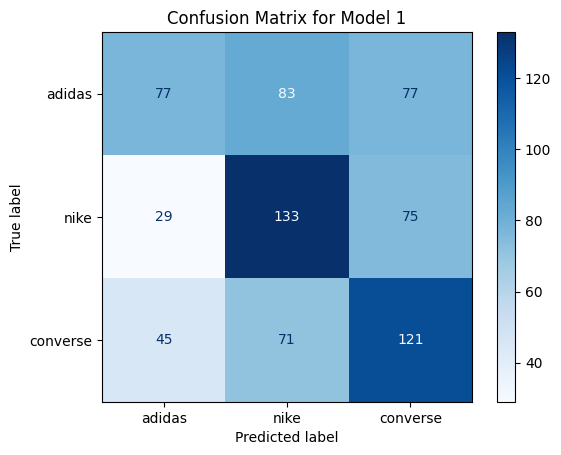

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 216ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 118ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 132ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 125ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 124ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 126ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 121ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 123ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 117ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 124ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 128ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 125ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 117ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 120ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 117ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 120ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 124ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 119ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 136ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 118ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 125ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 134ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 121ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 119ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 117ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 

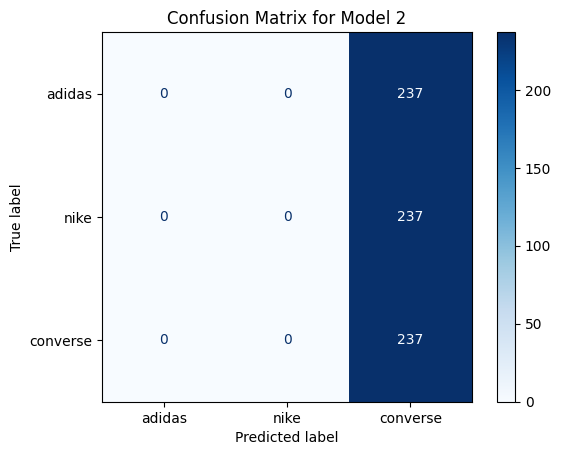

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 124ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step
1/1 ━━━━━━━

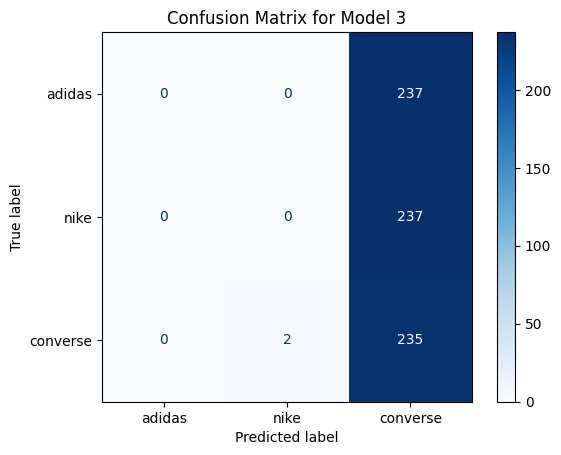

In [15]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Helper function to generate predictions and plot confusion matrix
def plot_confusion_matrix(model, dataset, class_names, title):
    # Generate predictions
    y_true = []
    y_pred = []

    for images, labels in dataset:
        predictions = model.predict(images)
        y_true.extend(labels.numpy())
        y_pred.extend(tf.argmax(predictions, axis=1).numpy())

    # Confusion Matrix
    cm = confusion_matrix(y_true, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_names)
    disp.plot(cmap='Blues', xticks_rotation='horizontal')
    plt.title(title)
    plt.show()

# Plot confusion matrices for all models
plot_confusion_matrix(model_1, test_dataset, class_names, "Confusion Matrix for Model 1")
plot_confusion_matrix(model_2, test_dataset, class_names, "Confusion Matrix for Model 2")
plot_confusion_matrix(model_3, test_dataset, class_names, "Confusion Matrix for Model 3")
